<a href="https://colab.research.google.com/github/lolikgiovi/MachineLearning_Project/blob/master/RockPaperScissors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rock - Paper - Scissor: Hand Gesture Classifier**
--
Classify an Images of Hand Gesture as Rock - Paper - or Scissors
--
This is my first Machine Learning project, initially as an Online Course (DICODING) assignment. The idea is to classify an Image as Rock-Paper-or-Scissors gesture. 

by Fashalli Giovi Bilhaq


# Data Preparation

In [1]:
# Dependencies Install

import tensorflow as tf
import zipfile, os, shutil, time
import sklearn
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.2.0


In [3]:
# Dataset Download (Zip)

!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-29 20:56:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.85MB/s    in 63s     

2020-07-29 20:57:43 (4.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
# Zip Extraction

storage = '/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(storage, 'r')
zip.extractall('/tmp')
zip.close()
print("Zip Extraction done")

Zip Extraction done


In [7]:
## Delete Unused Files

delete_dir = '/tmp/__MACOSX'

try:
    shutil.rmtree(delete_dir)
except OSError as e:
    print("Error: %s : %s" % (delete_dir, e.strerror))

In [8]:
## Check File Folders

print('Folders Extracted:')
os.listdir('/tmp/rockpaperscissors')

Folders Extracted:


['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [9]:
## Count Files Number

rock_len = len(os.listdir('/tmp/rockpaperscissors/rock'))
paper_len = len(os.listdir('/tmp/rockpaperscissors/paper'))
scissors_len = len(os.listdir('/tmp/rockpaperscissors/scissors'))
total_len = rock_len + paper_len + scissors_len

print ("Rock Images    : ", rock_len, "Files")
print ("Paper Images   : ", paper_len, "Files")
print ("Scissors Images: ", scissors_len, "Files")
print ("Total Images   : ", total_len, "Files\n")
print ("Allocating 40% data of Images as Validation Data")

Rock Images    :  726 Files
Paper Images   :  712 Files
Scissors Images:  750 Files
Total Images   :  2188 Files

Allocating 40% data of Images as Validation Data


In [10]:
## Set Directories Variables
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

## Create Directories
os.mkdir(train_dir)
os.mkdir(val_dir)
print('Training and Validation directory created')

Training and Validation directory created


In [11]:
## File Separation

# Create Train & Val Folder
try:
    os.makedirs('/tmp/rockpaperscissors/train/paper')
    os.makedirs('/tmp/rockpaperscissors/train/rock')
    os.makedirs('/tmp/rockpaperscissors/train/scissors')
except FileExistsError:
    print("Training directory already exists") 

try:
    os.makedirs('/tmp/rockpaperscissors/val/paper')
    os.makedirs('/tmp/rockpaperscissors/val/rock')
    os.makedirs('/tmp/rockpaperscissors/val/scissors')
except FileExistsError:
    print("Validation directory already exists") 

train_dir = os.path.join(base_dir, 'train')
train_paper = os.path.join(base_dir, 'train/paper')
train_rock = os.path.join(base_dir, 'train/rock')
train_scissors = os.path.join(base_dir, 'train/scissors')
print("Training directory path set")

val_dir = os.path.join(base_dir, 'val')
val_paper  = os.path.join(base_dir, 'val/paper')
val_rock  = os.path.join(base_dir, 'val/rock')
val_scissors  = os.path.join(base_dir, 'val/scissors')
print("Validation directory path set")

Training directory path set
Validation directory path set


In [12]:
## Data Separation
from sklearn.model_selection import train_test_split

train_rock_split, val_rock_split = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_split, val_paper_split = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_split, val_scissors_split = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [13]:
# Move File

for i in train_rock_split:
  shutil.move(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_split:
  shutil.move(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_split:
  shutil.move(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_split:
  shutil.move(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_split:
  shutil.move(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_split:
  shutil.move(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [14]:
train_rock_len = len(os.listdir(train_rock))
val_rock_len = len(os.listdir(val_rock))
train_paper_len = len(os.listdir(train_paper))
val_paper_len = len(os.listdir(val_paper))
train_scissors_len = len(os.listdir(train_scissors))
val_scissors_len = len(os.listdir(val_scissors))

print(train_rock_len, "Rock Images allocated as Training Data,",
      val_rock_len, "Rock Images allocated as Validation Data")
print(train_paper_len, "Paper Images allocated as Training Data,",
      val_paper_len, "Paper Images allocated as Validation Data")
print(train_scissors_len, "Scissors Images allocated as Training Data,",
      val_scissors_len, "Scissors Images allocated as Validation Data")
print("Total:",train_rock_len+train_paper_len+train_scissors_len,
      "Images Allocated as Training Data,", 
      val_rock_len+val_paper_len+val_scissors_len, 
      "Images Allocated as Validation Data")

435 Rock Images allocated as Training Data, 291 Rock Images allocated as Validation Data
427 Paper Images allocated as Training Data, 285 Paper Images allocated as Validation Data
450 Scissors Images allocated as Training Data, 300 Scissors Images allocated as Validation Data
Total: 1312 Images Allocated as Training Data, 876 Images Allocated as Validation Data


# Machine Learning Model Building

In [15]:
# Image Data Generator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip=True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip=True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    fill_mode = 'nearest')

print("Image Data Generation: Done")

Image Data Generation: Done


In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [17]:
# Sequential Model Building

model = tf.keras.models.Sequential([
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(16, (3,3), activation = 'swish', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation = 'swish'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'swish'),
  tf.keras.layers.Dense(3, activation = 'softmax')
])
print("Sequential Model Set: Done")

Sequential Model Set: Done


In [20]:
# Callback

def lrscheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

Callbacks = [
    tf.keras.callbacks.LearningRateScheduler(lrscheduler, verbose=1)
]

In [21]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adamax(learning_rate=0.001),
              metrics=['accuracy'])
print("Model Compile: Done")

Model Compile: Done


In [22]:
start = time.time()
model_fit = model.fit(train_generator,
                      steps_per_epoch = 25,
                      epochs = 40,
                      validation_data = validation_generator,
                      validation_steps = 5,
                      verbose =2,
                      callbacks = [Callbacks])
stop = time.time()
duration = (stop-start)/60


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 1/40
25/25 - 7s - loss: 1.0565 - accuracy: 0.4525 - val_loss: 0.9113 - val_accuracy: 0.5813 - lr: 0.0010

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 2/40
25/25 - 7s - loss: 0.7353 - accuracy: 0.6750 - val_loss: 0.7114 - val_accuracy: 0.7750 - lr: 0.0010

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 3/40
25/25 - 7s - loss: 0.5381 - accuracy: 0.8213 - val_loss: 0.4972 - val_accuracy: 0.8562 - lr: 0.0010

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 4/40
25/25 - 7s - loss: 0.3953 - accuracy: 0.8675 - val_loss: 0.3781 - val_accuracy: 0.8375 - lr: 0.0010

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 5/40
25/25 - 7s - loss: 0.2749 - accuracy: 0.9325 - val_loss: 0.3353 - val_accuracy: 0.9250 - lr: 0.0010

Epoch 00006: Learni

# Model Result

Highest validation accuracy: 0.987500011920929
Lowest  validation accuracy: 0.581250011920929
Training time: 4.90 minutes


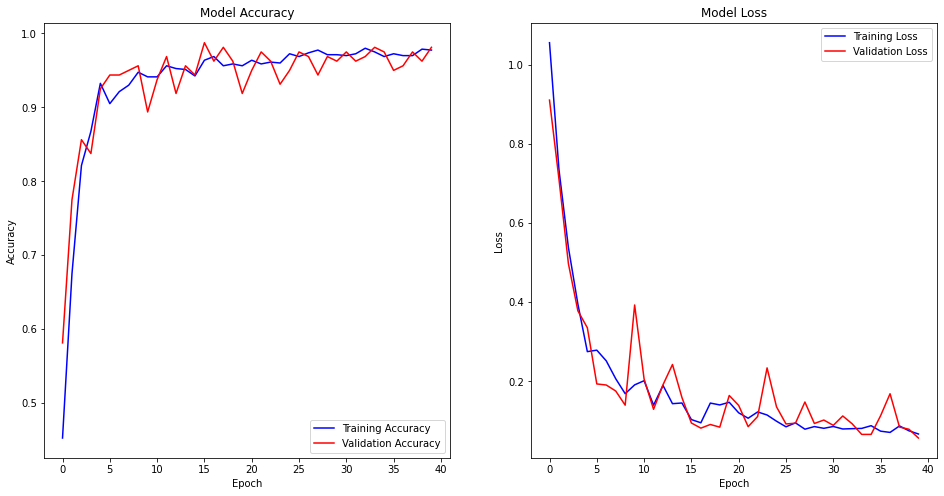

In [23]:
# Accuracy and Loss Rate

from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

train_accuracy = model_fit.history['accuracy']
train_loss = model_fit.history['loss']
val_accuracy = model_fit.history['val_accuracy']
val_loss = model_fit.history['val_loss']

epochs = range(40)

print('Highest validation accuracy:', max(val_accuracy))
print('Lowest  validation accuracy:', min(val_accuracy))
print("Training time: %.2f minutes" %duration)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Image Classifier Simulation

Saving 0cb6cVL8pkfi4wF6.png to 0cb6cVL8pkfi4wF6.png
0cb6cVL8pkfi4wF6.png
Paper


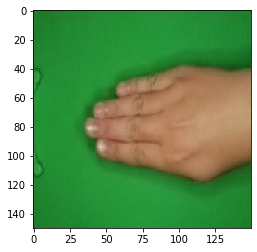

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('Scissors')